### 모듈 import

In [126]:
import numpy as np
import pandas as pd

# visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style="white")
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.unicode_minus'] = False    # minus

# interactive
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

### 노트북 세팅

In [4]:
# 노트북 세팅
pd.options.display.float_format = '{:.2f}'.format

## 유니콘 기업 재정의
- 2021년 (누적) 기준으로 유니콘 기업으로 선정된 기업들 중 하기 7개 기업의 국민연금 데이터로 분석 방향을 설정함

### 유니콘 기업으로 선정된 기업 정보 수집 
- 출처 : https://www.data.go.kr/data/3046071/fileData.do
- 수집 대상 기업 : 비바리퍼블리카, 쏘카, 무신사, 크래프톤, 야놀자, 에이프로젠, 지피클럽
- 수집 대상 기간 : 2015-2019년 (매년 12월 데이터)

In [ ]:
unicorn2019 = pd.read_csv("국민연금 가입 사업장 내역 2019년 12월.csv", encoding='cp949')
unicorn2018 = pd.read_csv("국민연금 가입 사업장 내역 2018년 12월.csv", encoding='cp949')
unicorn2017 = pd.read_csv("국민연금 가입 사업장 내역 2017년 12월.csv", encoding='cp949')
unicorn2016 = pd.read_csv("국민연금 가입 사업장 내역 2016년 12월.csv", encoding='cp949')
unicorn2015 = pd.read_csv("국민연금 가입 사업장 내역 2015년 12월.csv", encoding='cp949')

In [ ]:
df_unicorn=pd.DataFrame()
unicorn_list = ['비바리퍼블리카$', '쏘카', '주식회사 무신사', '크래프톤', '.주.야놀자$', '.주.에이프로젠$', '지피클럽']
for i in unicorn_list :
    df_unicorn = df_unicorn.append(unicorn2019[unicorn2019['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2018[unicorn2018['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2017[unicorn2017['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2016[unicorn2016['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2015[unicorn2015['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])

# 불필요한 컬럼 제거 및 인덱스 리셋
df_unicorn.drop(df_unicorn.filter(regex='주소|가입상태|우편번호|등록번호|등록일자|사업장업종코드 WKPL|탈퇴일자|구분코드').columns , axis=1, inplace=True)
df_unicorn = df_unicorn.reset_index().drop('index', axis=1)

# 컬럼명 재지정
unicorn_newcol = ['년월','사업장명','업종', '적용일자', '직원수', '연금보험료', '신규취득자수','상실가입자수' ]
df_unicorn.columns = unicorn_newcol

# 연도, 월 컬럼 생성
df_unicorn[['년도','월']]=pd.DataFrame(df_unicorn['년월'].str.split('-',2).tolist())
df_unicorn.drop(['년월','월'], axis=1, inplace=True)
df_unicorn['년도'] = df_unicorn['년도'].astype('int64')

# 7개 유니콘 기업 기본 정보 (trend 파악용)
df_unicorn.to_csv('유니콘기업정보.csv')

In [14]:
df_unicorn = pd.read_csv('유니콘기업정보.csv')
df_unicorn.head()

,Unnamed: 0,사업장명,업종,적용일자,직원수,연금보험료,신규취득자수,상실가입자수,년도
0,0,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,310,118457320,18,12,2019
1,1,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,158,57709520,5,3,2018
2,2,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,103,34070000,5,2,2017
3,3,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,60,17035140,5,3,2016
4,4,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,27,6171340,0,2,2015


In [6]:
# 데이터 보유 기간 동일
df_unicorn.groupby('사업장명').count()['년도']

사업장명
(주)야놀자        5
(주)에이프로젠      5
(주)크래프톤       5
주식회사 무신사      5
주식회사쏘카        5
（주）비바리퍼블리카    5
（주）지피클럽       5
Name: 년도, dtype: int64

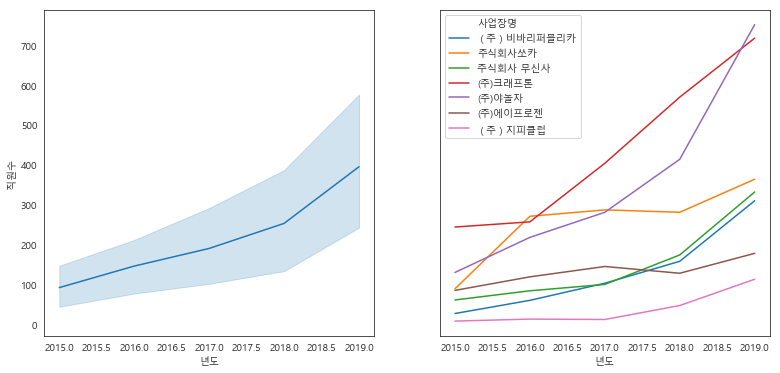

In [127]:
fig, axes = plt.subplots(ncols=2, figsize=(13,6), sharex=True, sharey=True)

sns.lineplot(data = df_unicorn[['사업장명','직원수','년도']], x='년도', y='직원수', ax=axes[0])
sns.lineplot(data = df_unicorn[['사업장명','직원수','년도']], x='년도', y='직원수', hue='사업장명', ax=axes[1])

In [11]:
# plotly
fig = px.line(df_unicorn, x="년도", y="직원수", 
             title='유니콘 기업 연도별 국민연금 가입자 수',
             color='사업장명',
             line_group='사업장명',
             hover_name='사업장명')
fig.update_layout(
    autosize=False,
    width=600,
    height=500)

fig.show()

In [15]:
# 유니콘 기업별 직원수 연성장율 기업가치 파악
df_unicorn_change = pd.DataFrame(df_unicorn.sort_values(['사업장명','년도']).groupby('사업장명')['직원수'].pct_change(periods=1)).rename(columns={'직원수':'성장율_직원수'}).fillna(0)
df_unicorn_change_total = pd.DataFrame(df_unicorn.sort_values(['사업장명','년도']).groupby('사업장명')['직원수'].pct_change(periods=4)).rename(columns={'직원수':'기간내성장율_직원수'}).fillna(0)

df_unicorn = df_unicorn.merge(df_unicorn_change,how='left', right_index=True,left_index=True)
df_unicorn = df_unicorn.merge(df_unicorn_change_total, how='left', right_index=True,left_index=True)

df_unicorn_growth = df_unicorn.groupby('사업장명').agg({'성장율_직원수':'mean'}).rename(columns={'성장율_직원수':'연평균성장율_직원수'})

# valuation 정보 추가
# valuation 정보는 유니콘 기업 선정시 공개자료 활용
df_unicorn_growth['valuation']=list((1,1.04,5,2.2,1,2.6,1.32))

# 유니콘 기업정보 최종 (직원수 - 성장율, 기간내성장율, 연평균성장율, valuation)
df_unicorn = df_unicorn.merge(df_unicorn_growth, on='사업장명', how='left')
df_unicorn.head(1)

,Unnamed: 0,사업장명,업종,적용일자,직원수,연금보험료,신규취득자수,상실가입자수,년도,성장율_직원수,기간내성장율_직원수,연평균성장율_직원수,valuation
0,0,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,310,118457320,18,12,2019,0.96,10.48,0.69,2.60


In [52]:
#df_unicorn[df_unicorn['년도']==2019].filter(regex='직원수|valuation|연금보험료').corr()['valuation']

In [72]:
df_unicorn.filter(regex='^직원수|연금보험료|valuation').corr()

,직원수,연금보험료,valuation
직원수,1.00,0.98,0.36
연금보험료,0.98,1.00,0.44
valuation,0.36,0.44,1.00


In [20]:
df_unicorn.iloc[:,1:]

,사업장명,업종,적용일자,직원수,연금보험료,신규취득자수,상실가입자수,년도,성장율_직원수,기간내성장율_직원수,연평균성장율_직원수,valuation
0,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,310,118457320,18,12,2019,0.96,10.48,0.69,2.60
1,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,158,57709520,5,3,2018,0.53,0.00,0.69,2.60
2,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,103,34070000,5,2,2017,0.72,0.00,0.69,2.60
3,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,60,17035140,5,3,2016,1.22,0.00,0.69,2.60
4,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,27,6171340,0,2,2015,0.00,0.00,0.69,2.60
5,주식회사쏘카,자동차 임대업(렌트카),2011-12-13,364,99589840,7,5,2019,0.30,3.09,0.48,1.00
6,주식회사쏘카,자동차 임대업(렌트카),2011-12-13,281,66470520,16,12,2018,-0.02,0.00,0.48,1.00
7,주식회사쏘카,자동차 임대업(렌트카),2011-12-13,287,53342760,8,10,2017,0.06,0.00,0.48,1.00
8,주식회사쏘카,자동차 임대업(렌트카),2011-12-13,271,49231800,27,11,2016,2.04,0.00,0.48,1.00
9,주식회사쏘카,자동차 임대업(렌트카),2011-12-13,89,18339080,10,4,2015,0.00,0.00,0.48,1.00


### 데이터 로드

In [74]:
# 원본데이터 nps
nps = pd.read_csv('../company_nps_data.csv', encoding = 'CP949')
df = nps.copy()

In [124]:
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


### 데이터 개요

In [24]:
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [25]:
df.columns

Index(['회사ID', '연매출액', '년도', '월', '월별_연금보험료', '월별_직원수'], dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [27]:
df['년도'].describe()   # 2015년 - 2019년

count   99801.00
mean     2016.97
std         0.98
min      2015.00
25%      2016.00
50%      2017.00
75%      2018.00
max      2019.00
Name: 년도, dtype: float64

In [28]:
df['회사ID'].nunique()  # 5000개 회사

5000

In [29]:
df.sort_values(['회사ID','년도','월'])

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
33039,63,11328779396,2018,1,403119840,1006
74251,63,11328779396,2018,2,406770960,1018
80947,63,11328779396,2018,3,404826240,1013
80770,63,11328779396,2018,4,404211800,1012
28110,63,11328779396,2018,5,400339640,1002
...,...,...,...,...,...,...
244,3312354,1451563,2019,9,1312200,3
38757,3312354,1451563,2019,10,1312200,3
49019,3312354,1451563,2019,11,1312200,3
72163,3312354,1451563,2019,12,1312200,3


- 5000개의 회사 데이터
- '회사ID', '연매출액', '년도', '월', '월별_연금보험료', '월별_직원수'
- 대상 기간: 2015년 - 2019년 (회사마다 데이터 보유기간 상이)

## EDA
**EDA 목적 :유니콘 지수 산출**
>   - 데이터 파악 및 전처리 작업으로 최종 분석 데이터셋 구성
>   - 최종 분석 데이터셋으로 유니콘 지수 산출 (스코어링에 필요한 지표 및 가중치 파악)

### 분석대상 필터링
- 1개월의 데이터만 존재하는 경우, 성장성 파악이 어렵기 때문에 eda에서 제외함

In [75]:
# 회사 연도 월별 sort
df_eda = df.sort_values(['회사ID','년도','월']).reset_index().drop('index', axis=1)
df_eda.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,63,11328779396,2018,1,403119840,1006
1,63,11328779396,2018,2,406770960,1018
2,63,11328779396,2018,3,404826240,1013
3,63,11328779396,2018,4,404211800,1012
4,63,11328779396,2018,5,400339640,1002


In [76]:
drop_list1 = df_eda.groupby('회사ID').count().query('월==1').index
# df.groupby('회사ID').count().query('월==1')
df_eda = df_eda[~df_eda['회사ID'].isin(drop_list1)].sort_values(['회사ID','년도','월'])
df_eda.shape

(99762, 6)

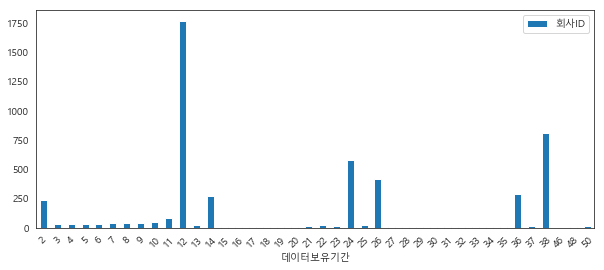

In [128]:
df_periodsize = pd.DataFrame(df_eda.groupby('회사ID').size()).reset_index().rename(columns={0:'데이터보유기간'})
df_periodsize.groupby('데이터보유기간').count().plot.bar(rot=45, figsize=(10,4))

In [33]:
# 4961 개의 회사
df_eda['회사ID'].nunique()

4961

**분석대상기업**
> - 적어도 2개월 이상의 데이터 가진 기업 4961개
> - 12개월(1년) 데이터 가진 기업 다수

### 성장율
> - 회사 ID별로 데이터 기간 상이하나, 기준시점/비교시점의 연금보험료/직원수/연매출액 성장율을 파악하고자 함
> - **회사 ID별 제일빠른시점 = 기준시점, 제일최근시점 = 비교시점**

In [35]:
start = df_eda.groupby('회사ID').min('index').reset_index()
start = start.rename(columns={'월별_연금보험료': '기준_연금보험료',
                              '월별_직원수':'기준_직원수',
                              '연매출액':'기준_연매출액',
                              '년도' :'기준_년도',
                              '월':'기준_월'})
end = df_eda.groupby('회사ID').max('index').reset_index()
end = end.rename(columns={'월별_연금보험료': '비교_연금보험료',
                          '월별_직원수':'비교_직원수',         
                          '연매출액':'비교_연매출액',
                          '년도' :'비교_년도',  
                          '월':'비교_월'})

In [36]:
# 계산 shape 일치 확인
print(start.shape)
print(end.shape)

(4961, 6)
(4961, 6)


In [37]:
df_growth = start.merge(end, how='inner', on ='회사ID')
df_growth.head(3)

,회사ID,기준_연매출액,기준_년도,기준_월,기준_연금보험료,기준_직원수,비교_연매출액,비교_년도,비교_월,비교_연금보험료,비교_직원수
0,63,11328779396,2018,1,400339640,995,11328779396,2018,12,419953960,1018
1,95,656947437,2018,1,209916320,522,656947437,2018,12,219997840,562
2,102,742658938,2018,5,168943080,722,742658938,2018,12,178850980,785


In [38]:
# 지표별 기간내 성장율 변수 추가
df_growth['성장율_연금보험료'] = (df_growth['비교_연금보험료']-df_growth['기준_연금보험료'])/df_growth['기준_연금보험료']
df_growth['성장율_직원수'] = (df_growth['비교_직원수']-df_growth['기준_직원수'])/df_growth['기준_직원수']

# 대상기간이 1년보다 짧은 경우가 많기 때문에 0일 가능성 높음
df_growth['성장율_연매출액'] = (df_growth['비교_연매출액']-df_growth['기준_연매출액'])/df_growth['기준_연매출액']
df_growth.head(3) 

,회사ID,기준_연매출액,기준_년도,기준_월,기준_연금보험료,기준_직원수,비교_연매출액,비교_년도,비교_월,비교_연금보험료,비교_직원수,성장율_연금보험료,성장율_직원수,성장율_연매출액
0,63,11328779396,2018,1,400339640,995,11328779396,2018,12,419953960,1018,0.05,0.02,0.00
1,95,656947437,2018,1,209916320,522,656947437,2018,12,219997840,562,0.05,0.08,0.00
2,102,742658938,2018,5,168943080,722,742658938,2018,12,178850980,785,0.06,0.09,0.00


In [53]:
# 지표별 기간내 증감 변수 추가
df_growth['증감_연금보험료'] = (df_growth['비교_연금보험료']-df_growth['기준_연금보험료'])
df_growth['증감_직원수'] = (df_growth['비교_직원수']-df_growth['기준_직원수'])

# 대상기간이 1년보다 짧은 경우가 많기 때문에 0일 가능성 높음
df_growth['증감_연매출액'] = (df_growth['비교_연매출액']-df_growth['기준_연매출액'])

In [54]:
df_growth.filter(regex='성장율|증감').describe().T

,count,mean,std,min,25%,50%,75%,max
성장율_연금보험료,4960.00,inf,NaN,0.00,0.22,0.43,0.81,inf
성장율_직원수,4960.00,inf,NaN,0.00,0.20,0.36,0.67,inf
성장율_연매출액,4961.00,1.56,37.27,-12.11,0.00,0.04,0.44,2362.12
증감_연금보험료,4961.00,2471333.68,11909820.34,0.00,307800.00,713040.00,1601140.00,398886080.00
증감_직원수,4961.00,9.52,42.31,0.00,1.00,3.00,7.00,1534.00
증감_연매출액,4961.00,4760395.73,51955184.86,0.00,0.00,61753.00,1402615.00,2950589471.00


#### 마이너스 성장

In [78]:
# 증감 (매출액) 마이너스 제외 0개
drop_list2 = list(df_growth[df_growth['증감_연매출액']<0]['회사ID'])
df_eda = df_eda[~df_eda['회사ID'].isin(drop_list2)].sort_values(['회사ID','년도','월'])
print(df_eda.shape)
print('세부 분석 대상 기업 :', df_eda['회사ID'].nunique())

(99762, 6)
세부 분석 대상 기업 : 4961


In [79]:
df_eda = df_eda.merge(df_growth.filter(regex='회사ID|성장율|증감'), on='회사ID', how='left')
df_eda.head(3)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,성장율_연금보험료,성장율_직원수,성장율_연매출액,증감_연금보험료,증감_직원수,증감_연매출액
0,63,11328779396,2018,1,403119840,1006,0.05,0.02,0.00,19614320,23,0
1,63,11328779396,2018,2,406770960,1018,0.05,0.02,0.00,19614320,23,0
2,63,11328779396,2018,3,404826240,1013,0.05,0.02,0.00,19614320,23,0


In [119]:
df_eda.filter(regex='회사ID|성장율|증감').groupby('회사ID').agg({'성장율_연금보험료':'mean','성장율_직원수':'mean', '성장율_연매출액' : 'mean',
                                                        '증감_연금보험료':'mean','증감_직원수':'mean', '증감_연매출액' : 'mean' })

,성장율_연금보험료,성장율_직원수,성장율_연매출액,증감_연금보험료,증감_직원수,증감_연매출액
회사ID,,,,,,
63,0.05,0.02,0.00,19614320,23,0
95,0.05,0.08,0.00,10081520,40,0
102,0.06,0.09,0.00,9907900,63,0
295,0.33,0.36,0.00,23451220,84,0
414,0.09,0.02,0.00,6952600,6,0
...,...,...,...,...,...,...
1949405,0.24,0.67,0.00,278100,2,0
2329349,5.74,5.00,0.00,4037400,15,0
2400284,1.89,1.33,0.00,1036520,4,0


##### ?
- 분석 대상 기업 선정시 데이터 보유 기간 고려 필요해보임
- 성장율 지표 계산방법?

#### 매출액

#### 직원수

### 데이터 보유기간 
- 데이터 보유 기간이 길면, 인지도popularity 가 높지 않을까 ?
- 데이터 보유 기간과 지표들간의 관계?

In [82]:
df_eda = df_eda.merge(df_periodsize, on='회사ID', how='left')
df_eda

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,성장율_연금보험료,성장율_직원수,성장율_연매출액,증감_연금보험료,증감_직원수,증감_연매출액,데이터보유기간
0,63,11328779396,2018,1,403119840,1006,0.05,0.02,0.00,19614320,23,0,12
1,63,11328779396,2018,2,406770960,1018,0.05,0.02,0.00,19614320,23,0,12
2,63,11328779396,2018,3,404826240,1013,0.05,0.02,0.00,19614320,23,0,12
3,63,11328779396,2018,4,404211800,1012,0.05,0.02,0.00,19614320,23,0,12
4,63,11328779396,2018,5,400339640,1002,0.05,0.02,0.00,19614320,23,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99757,3312354,1451563,2019,8,1312200,3,0.00,0.00,0.00,0,0,0,5
99758,3312354,1451563,2019,9,1312200,3,0.00,0.00,0.00,0,0,0,5
99759,3312354,1451563,2019,10,1312200,3,0.00,0.00,0.00,0,0,0,5
99760,3312354,1451563,2019,11,1312200,3,0.00,0.00,0.00,0,0,0,5


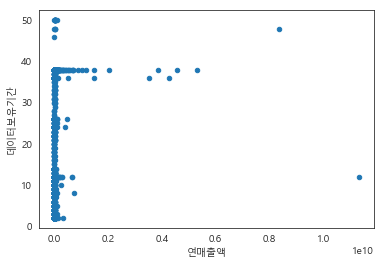

In [129]:
df_eda.groupby('회사ID').agg({'연매출액':'mean','월별_직원수':'mean', '월별_연금보험료' : 'mean','데이터보유기간':'mean'}).plot.scatter(x='연매출액',y='데이터보유기간', figsize=(6,4))

- 연관성 없음 ! 

### 연도별

In [463]:
df_sales = df.groupby(['회사ID','년도']).agg({'연매출액':'mean','월별_직원수':'mean', '월별_연금보험료' : 'mean'}).reset_index()
df_sales.rename(columns={'월별_직원수':'월평균_직원수', '월별_연금보험료':'월평균_연금보험료'}, inplace=True)
df_sales.head()

,회사ID,년도,연매출액,월평균_직원수,월평균_연금보험료
0,63,2018,11328779396,1007.17,410128228.33
1,102,2018,742658938,752.12,173769522.50
2,597,2018,208141595,178.83,54797751.67
3,786,2018,65514573,167.42,46053843.33
4,917,2018,42843708,148.67,48111878.33


In [464]:
df_year = pd.DataFrame(df_sales.value_counts('회사ID')).reset_index().rename(columns={0:'연수'})
df_year.head()

,회사ID,연수
0,135668,5
1,404192,5
2,296819,5
3,14271,5
4,442467,5


<AxesSubplot:>

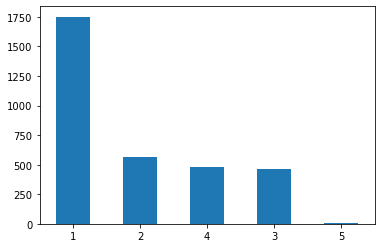

In [465]:
df_year['연수'].value_counts().plot.bar(rot=0)

- 데이터셋에 기간편차 존재 : 회사마다 데이터 기간이 상이함
- 1개년치 데이터만 보유한 기업이 50%

In [466]:
df_year= df_year.merge(df_sales.groupby('회사ID').agg({'연매출액':'mean', 
                                            '월평균_직원수':'mean',
                                            '월평균_연금보험료':'mean'}
                                          ).reset_index().rename(columns={'연매출액':'연평균_매출액',
                                                                         '월평균_직원수':'연평균_직원수',
                                                                         '월평균_연금보험료':'연평균_연금보험료'}),
              how='inner', on='회사ID')
df_year.head()

,회사ID,연수,연평균_매출액,연평균_직원수,연평균_연금보험료
0,135668,5,22746407.60,32.95,9118156.67
1,404192,5,6817502.80,86.88,22606934.67
2,296819,5,13545635.20,47.55,15822334.00
3,14271,5,5578039.80,17.45,3886142.33
4,442467,5,24874211.20,32.38,7048736.67


In [467]:
df_year['1인당연평균매출액']=df_year['연평균_매출액']/df_year['연평균_직원수']
df_year.head()

,회사ID,연수,연평균_매출액,연평균_직원수,연평균_연금보험료,1인당연평균매출액
0,135668,5,22746407.60,32.95,9118156.67,690331.03
1,404192,5,6817502.80,86.88,22606934.67,78467.33
2,296819,5,13545635.20,47.55,15822334.00,284871.40
3,14271,5,5578039.80,17.45,3886142.33,319658.44
4,442467,5,24874211.20,32.38,7048736.67,768117.69


- 직원 수가 감소한 곳은 분석 대상에서 제외

In [189]:
df.groupby(['회사ID','년도','월']).

<AxesSubplot:>

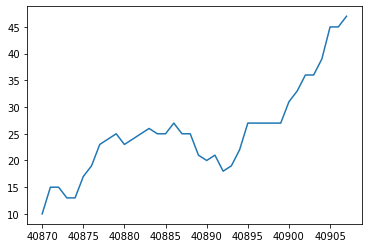

In [479]:
sns.lineplot(data=df, x='df[df['회사ID']==233757]['월별_직원수'].plot.line()

<AxesSubplot:xlabel='연평균_연금보험료', ylabel='연평균_직원수'>

C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54744 mi

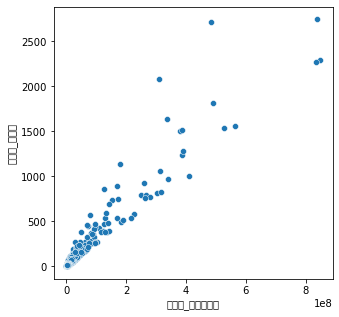

In [308]:
plt.figure(figsize =(5,5))
sns.scatterplot(data = df_year, x='연평균_연금보험료',y='연평균_직원수')

- 직원수와 연금보험료 거의 동일

#### 데이터 보유기간별 회사 추이 파악

## 유니콘 기업 지수 (스코어링) 산출 방향성
1. 직원수로 class 구분 
2. 스코어링 지표 1-5점 척도
> - 1인당 매출액
> - 연성장율_연금보험료
> - 연성장율_직원수
> - 연성장율_매출액
